In [1]:
import numpy as np
import pandas as pd
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_, ureg, Reaction
import equilibrator_pathway
from equilibrator_pathway import ThermodynamicModel
import matplotlib.pyplot as plt

print('equlibrator_api version:', equilibrator_api.__version__)
print('equlibrator_pathway version:', equilibrator_pathway.__version__)

import warnings
warnings.filterwarnings('ignore')

ureg.default_format = ".2f~P"
plt.rc('axes', axisbelow=True)
ureg.setup_matplotlib(True)

comp_contrib = ComponentContribution()

equlibrator_api version: 0.4.7
equlibrator_pathway version: 0.4.7


In [2]:
comp_contrib.p_h = Q_(7)
comp_contrib.ionic_strength = Q_('250 mM')
comp_contrib.p_mg = Q_(3)

In [3]:
THETA = ThermodynamicModel.from_sbtab("THETA.tsv", comp_contrib=comp_contrib) 
print(THETA.net_reaction_formula)

3 atp + 2 co2 + coa + h2o + 2 nadh + 3 nadph + uq = accoa + 2 adp + amp + 2 nad + 3 nadp + 4 pi + uqh2


In [4]:
THETA.update_standard_dgs()
mdf_result_THETA = THETA.mdf_analysis()

mdf_result_THETA.reaction_df

,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,PPS,atp + h2o + pyr = amp + pep + pi,1.00 mM/s,0.41 kJ/mol,0.26 kJ/mol,-16.85 kJ/mol,-15.89 kJ/mol,0.0
1,PPC,co2 + h2o + pep = oaa + pi,1.00 mM/s,-37.70 kJ/mol,-44.42 kJ/mol,-44.42 kJ/mol,-20.10 kJ/mol,0.0
2,MDH,nadh + oaa = mal + nad,1.00 mM/s,-29.56 kJ/mol,-29.63 kJ/mol,-29.63 kJ/mol,-17.77 kJ/mol,0.0
3,FUM,mal = fum + h2o,1.00 mM/s,3.43 kJ/mol,3.44 kJ/mol,3.44 kJ/mol,-13.69 kJ/mol,0.0
4,FRD,fum + nadh = nad + succ,1.00 mM/s,-61.22 kJ/mol,-59.62 kJ/mol,-59.62 kJ/mol,-34.56 kJ/mol,0.0
5,SucCD,atp + coa + succ = adp + pi + succoa,1.00 mM/s,-1.75 kJ/mol,-2.19 kJ/mol,-2.19 kJ/mol,-12.30 kJ/mol,0.0
6,SCR,nadph + succoa = coa + nadp + sucsal,1.00 mM/s,11.06 kJ/mol,8.25 kJ/mol,-8.86 kJ/mol,-12.49 kJ/mol,0.0
7,SSR,nadph + sucsal = h4but + nadp,1.00 mM/s,0.51 kJ/mol,0.40 kJ/mol,0.40 kJ/mol,-12.22 kJ/mol,0.0
8,HBS,atp + coa + h4but = 4hbutcoa + adp + pi,1.00 mM/s,-16.28 kJ/mol,-16.61 kJ/mol,-16.61 kJ/mol,-12.18 kJ/mol,0.0
9,HBD,4hbutcoa = b2coa + h2o,1.00 mM/s,-10.85 kJ/mol,-11.22 kJ/mol,-11.22 kJ/mol,-12.15 kJ/mol,0.0


In [5]:
print(f"physiological_dg_prime of overall reaction:",
    f"{mdf_result_THETA.reaction_df['physiological_dg_prime'].sum()}")

print(f"optimized_dg_prime of overall reaction:",
    f"{mdf_result_THETA.reaction_df['optimized_dg_prime'].sum()}")

physiological_dg_prime of overall reaction: -261.48 kJ/mol
optimized_dg_prime of overall reaction: -249.04 kJ/mol


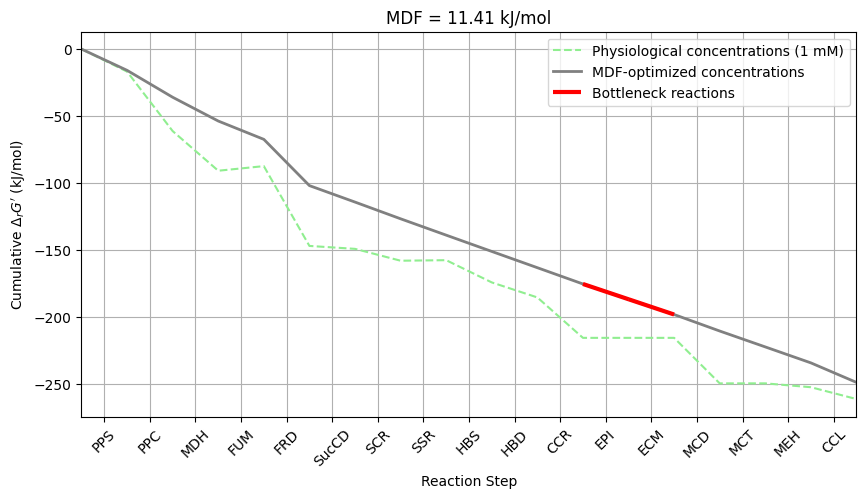

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
mdf_result_THETA.plot_driving_forces(ax)
ax.grid('on')
fig.savefig('mdf_result_THETA_ambient.eps')

In [8]:
mdf_result_THETA.compound_df

,compound_id,concentration,lower_bound,upper_bound,shadow_price
0,pyr,0.00 M,0.00 mM,10.00 mM,-0.00000
1,atp,0.00 M,5.00 mM,5.00 mM,0.00000
2,h2o,1.00 M,1.00 M,1.00 M,0.00000
3,pep,0.00 M,0.00 M,0.01 M,-0.00000
4,amp,0.00 M,1.00 mM,1.00 mM,-0.00000
5,pi,0.01 M,10.00 mM,10.00 mM,-0.00000
6,co2,0.00 M,0.01 mM,0.01 mM,0.00000
7,oaa,0.00 M,0.00 M,0.01 M,0.00000
8,nadh,0.00 M,0.10 mM,0.10 mM,-0.00000
9,mal,0.00 M,0.00 M,0.01 M,0.00000


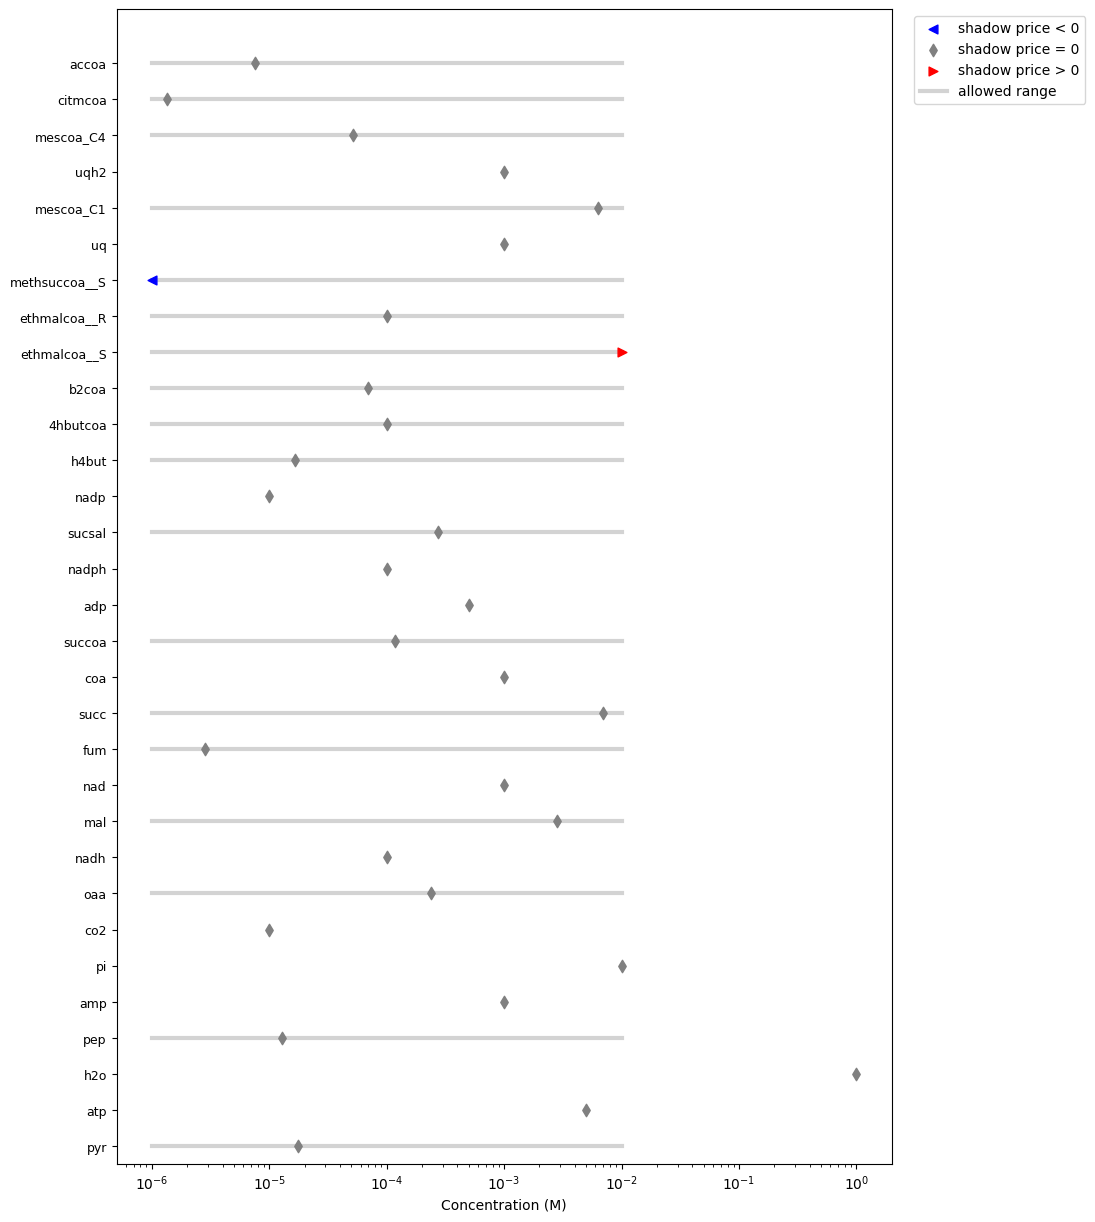

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
mdf_result_THETA.plot_concentrations(ax)
fig.savefig('mdf_result_THETA_cpd.eps')